# Time series forecasting E-commerce sales using Neural Prophet

In [37]:
import pandas as pd
from neuralprophet import NeuralProphet
import pickle

In [44]:
df_commerce = pd.read_csv('../data/e_commerce_uk.csv', encoding = 'ISO-8859-1')

In [45]:
df_commerce.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [46]:
df = pd.DataFrame({
    'ds': pd.to_datetime(df_commerce.InvoiceDate),
    'y': df_commerce.Quantity * df_commerce.UnitPrice
}).groupby('ds').sum().reset_index().rename(columns={'index':'ds'})

df.shape

(23260, 2)

In [47]:
df.head()

,ds,y
0,2010-12-01 08:26:00,139.12
1,2010-12-01 08:28:00,22.20
2,2010-12-01 08:34:00,348.78
3,2010-12-01 08:35:00,17.85
4,2010-12-01 08:45:00,855.86


In [48]:
df = df[-8000:]

In [64]:
m = NeuralProphet(learning_rate=0.001, epochs=3000, n_forecasts=1)

In [65]:
metrics = m.fit(df, freq='H')

INFO - (NP.df_utils._infer_frequency) - Major frequency T corresponds to 24.475% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq H. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
WARNING - (py.warnings._showwarnmsg) - /opt/homebrew/Caskroom/miniforge/base/envs/forecastingEcommerceSales/lib/python3.8/site-packages/neuralprophet/df_utils.py:161: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, "ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - /opt/homebrew/Caskroom/mini

In [66]:
future = m.make_future_dataframe(df=df, periods=24*2)
forecast = m.predict(df=future)

INFO - (NP.df_utils._infer_frequency) - Major frequency T corresponds to 24.475% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq H. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 97.917% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 97.917% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
WARNING - (py.warnings._showwarnmsg) - /opt/homebrew/Caskroom/miniforge/base/envs/forecastingEcommerceSales/lib/python3.8/site-packages/neuralprophet/forecaster.py:1406: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

In [69]:
forecast.head()

,ds,y,yhat1,residual1,trend,season_weekly,season_daily
0,2011-12-09 13:50:00,None,479.203125,NaN,-15269.343750,-4.126756,15752.667969
1,2011-12-09 14:50:00,None,586.265625,NaN,-15269.046875,3.945738,15851.375000
2,2011-12-09 15:50:00,None,544.593750,NaN,-15268.750000,12.234771,15801.108398
3,2011-12-09 16:50:00,None,631.046875,NaN,-15268.437500,20.661726,15878.824219
4,2011-12-09 17:50:00,None,719.796875,NaN,-15268.140625,29.144897,15958.797852


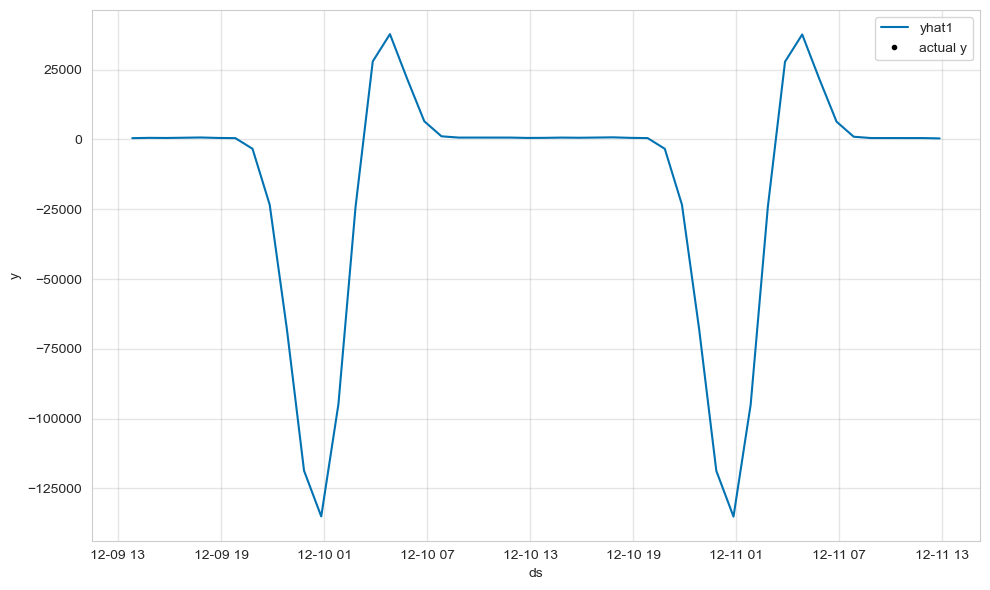

In [72]:
_ = m.plot(forecast)

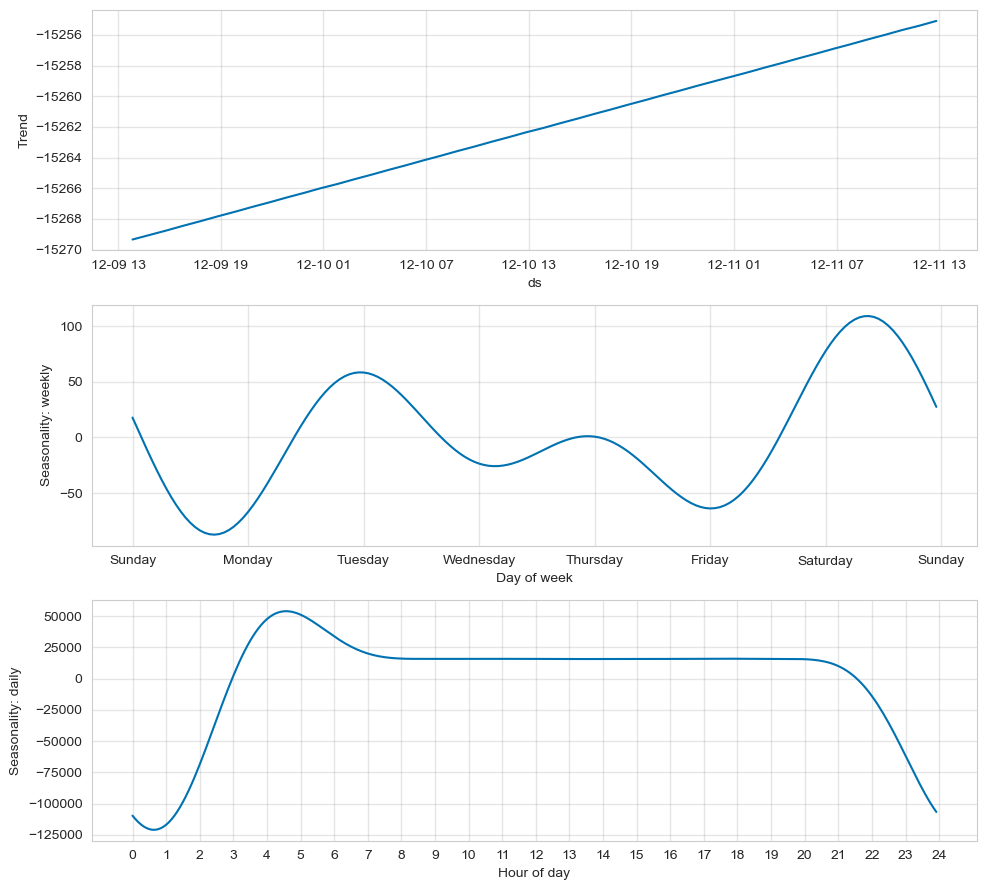

In [73]:
_ = m.plot_components(forecast)

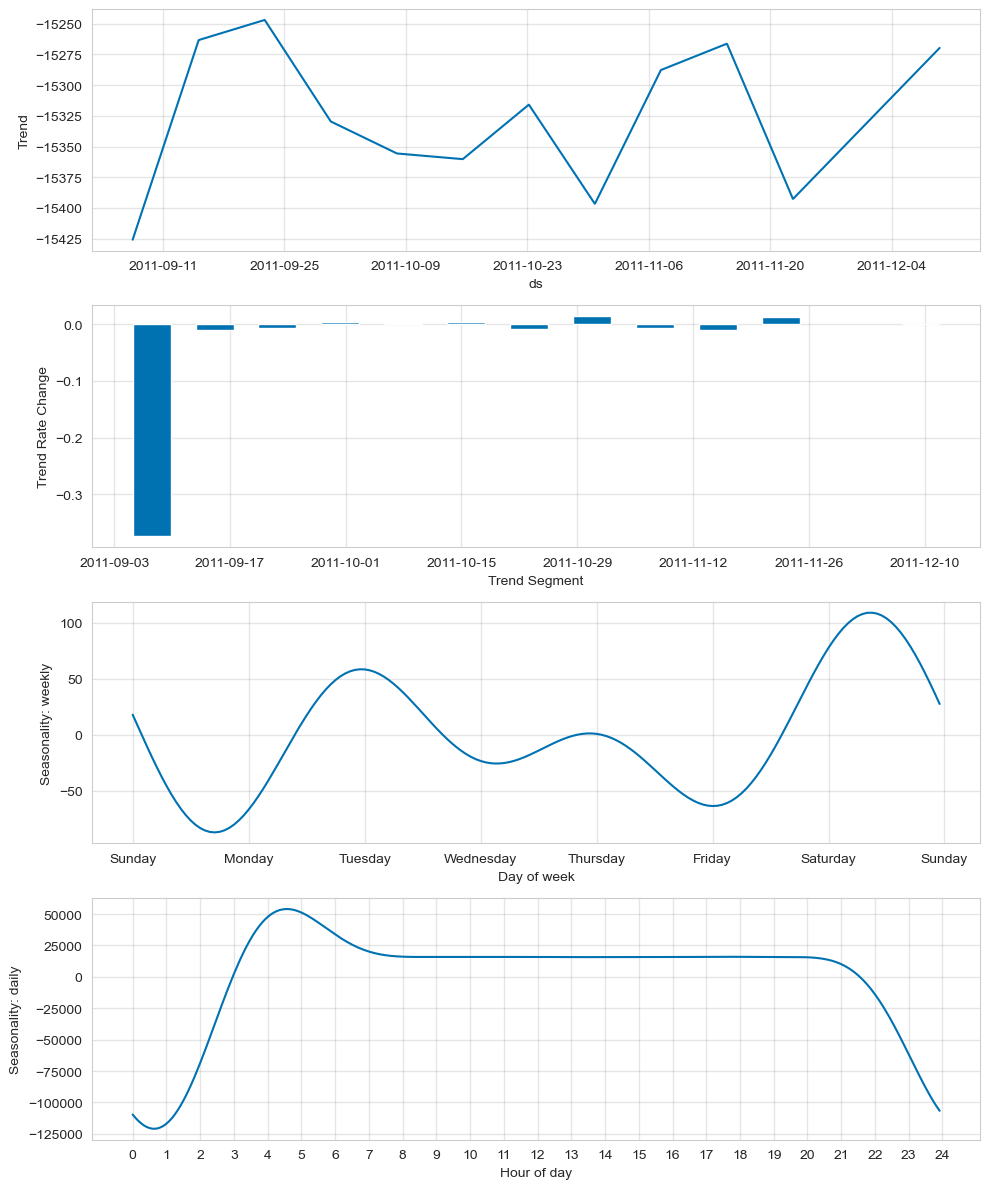

In [74]:
_ = m.plot_parameters()

### Save model

In [75]:
with open('../models/n_prophet_fcast.pkl', 'wb') as f:
    pickle.dump(m, f)

### Load model

In [76]:
stored_m = None

with open('../models/n_prophet_fcast.pkl', 'rb') as f:
    stored_m = pickle.load(f)

In [80]:
future = stored_m.make_future_dataframe(df=df, periods=24*2)
forecast = stored_m.predict(df=future)

INFO - (NP.df_utils._infer_frequency) - Major frequency T corresponds to 24.475% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq H. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 97.917% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 97.917% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
WARNING - (py.warnings._showwarnmsg) - /opt/homebrew/Caskroom/miniforge/base/envs/forecastingEcommerceSales/lib/python3.8/site-packages/neuralprophet/forecaster.py:1406: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

In [81]:
forecast.head()

,ds,y,yhat1,residual1,trend,season_weekly,season_daily
0,2011-12-09 13:50:00,None,479.203125,NaN,-15269.343750,-4.126756,15752.667969
1,2011-12-09 14:50:00,None,586.265625,NaN,-15269.046875,3.945738,15851.375000
2,2011-12-09 15:50:00,None,544.593750,NaN,-15268.750000,12.234771,15801.108398
3,2011-12-09 16:50:00,None,631.046875,NaN,-15268.437500,20.661726,15878.824219
4,2011-12-09 17:50:00,None,719.796875,NaN,-15268.140625,29.144897,15958.797852


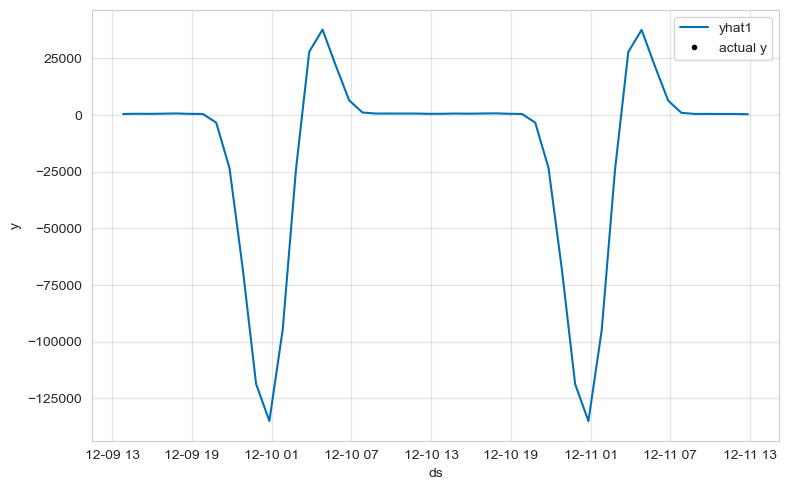

In [86]:
_ = m.plot(forecast, figsize=(8,5))